In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

In [2]:
with open('./result.csv', 'r') as f:
    results = pd.read_csv(f)

In [3]:
e_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'Valence', 'Arousal', 'like']
primes = ['none', 'bpm', 'chord', 'lyrics', 'playcount']

In [4]:
results = results.sort_values(by=['m_id', 'prime'])
results

,m_id,prime,C1,C2,C3,C4,C5,C6,Valence,Arousal,like
175,1,bpm,-2,-2,1,-1,1,1,0,0,-1
208,1,bpm,1,-1,0,0,2,0,-1,1,0
826,1,bpm,1,1,-1,0,-1,-1,0,0,-2
369,1,chord,-1,-1,1,0,1,-1,-1,0,0
498,1,chord,-1,-2,2,0,1,-2,-2,0,-1
1279,1,chord,-1,-2,1,-2,1,-2,-2,1,-2
146,1,lyrics,1,0,1,0,0,0,0,1,0
459,1,lyrics,0,0,0,-1,1,-1,0,-1,-1
1434,1,lyrics,1,0,1,0,1,-2,-1,-1,0
87,1,none,1,-1,1,1,-2,-2,0,1,2


In [5]:
results.groupby('prime').mean().loc[primes, e_items]

,C1,C2,C3,C4,C5,C6,Valence,Arousal,like
prime,,,,,,,,,
none,0.473333,0.263333,-0.186667,0.256667,-0.493333,-0.243333,0.166667,0.380000,0.433333
bpm,0.423333,0.270000,-0.133333,0.273333,-0.516667,-0.186667,0.166667,0.276667,0.433333
chord,0.406667,0.220000,-0.166667,0.323333,-0.460000,-0.286667,0.140000,0.250000,0.356667
lyrics,0.466667,0.183333,-0.043333,0.166667,-0.473333,-0.136667,0.163333,0.226667,0.423333
playcount,0.486667,0.363333,-0.216667,0.256667,-0.486667,-0.193333,0.203333,0.263333,0.433333


In [6]:
nones = results[results['prime'] == 'none']
bpms = results[results['prime'] == 'bpm']
chords = results[results['prime'] == 'chord']
lyrics = results[results['prime'] == 'lyrics']
playcounts = results[results['prime'] == 'playcount']

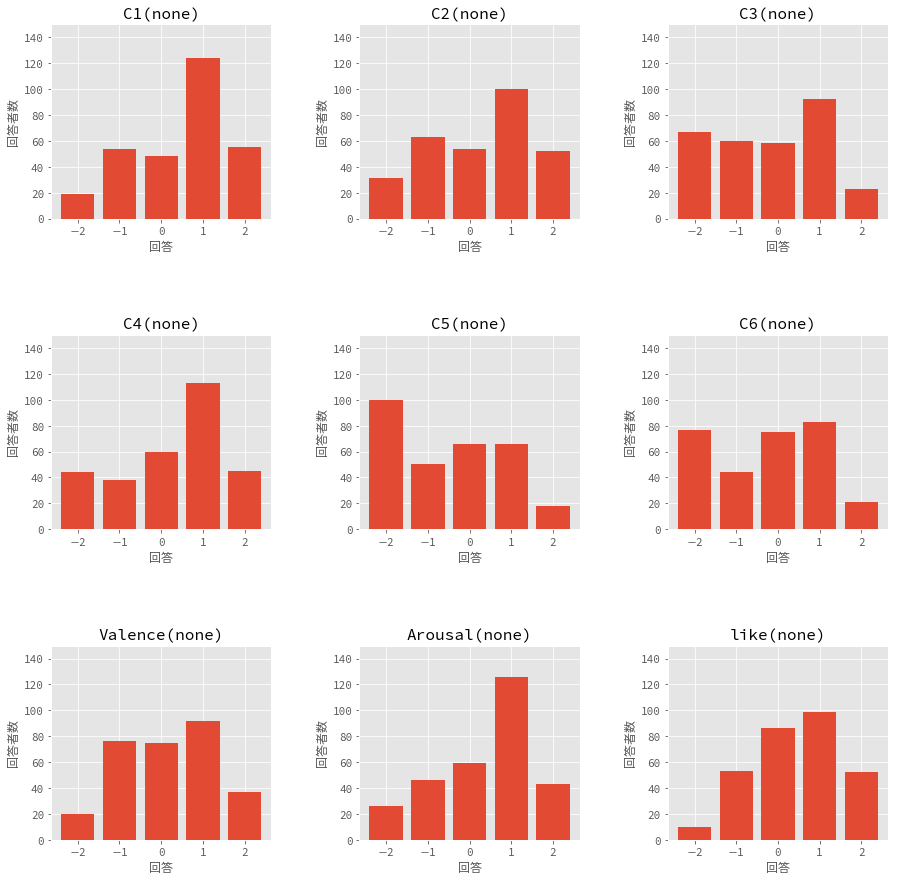

In [33]:
plt.clf()
fig, axes = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items):
    y = nones.groupby(e_item).size()
    x = list(y.index)
    px = int(i / 3)
    py = i % 3
    axes[px, py].bar(x, y)
    axes[px, py].set_title('%s(none)' % e_item)
    axes[px, py].set_ylabel('回答者数')
    axes[px, py].set_xlabel('回答')
    axes[px, py].set_ylim([0, 150])
plt.show()

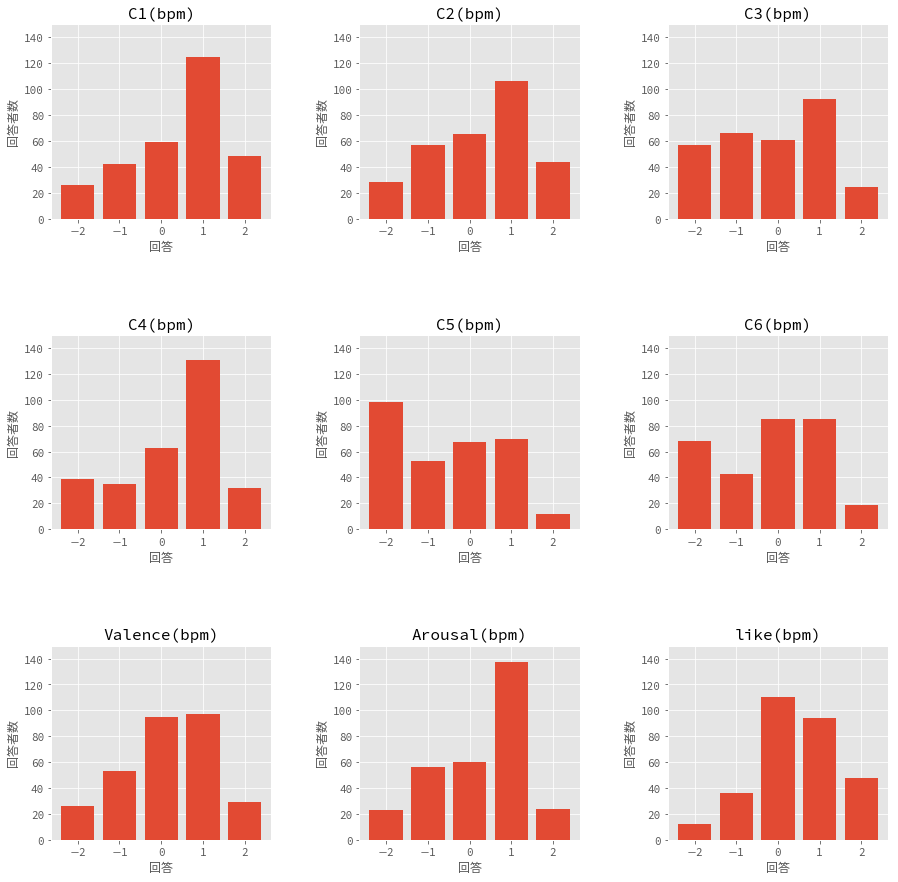

In [34]:
plt.clf()
fig, axes = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items):
    y = bpms.groupby(e_item).size()
    x = list(y.index)
    px = int(i / 3)
    py = i % 3
    axes[px, py].bar(x, y)
    axes[px, py].set_title('%s(bpm)' % e_item)
    axes[px, py].set_ylabel('回答者数')
    axes[px, py].set_xlabel('回答')
    axes[px, py].set_ylim([0, 150])
plt.show()

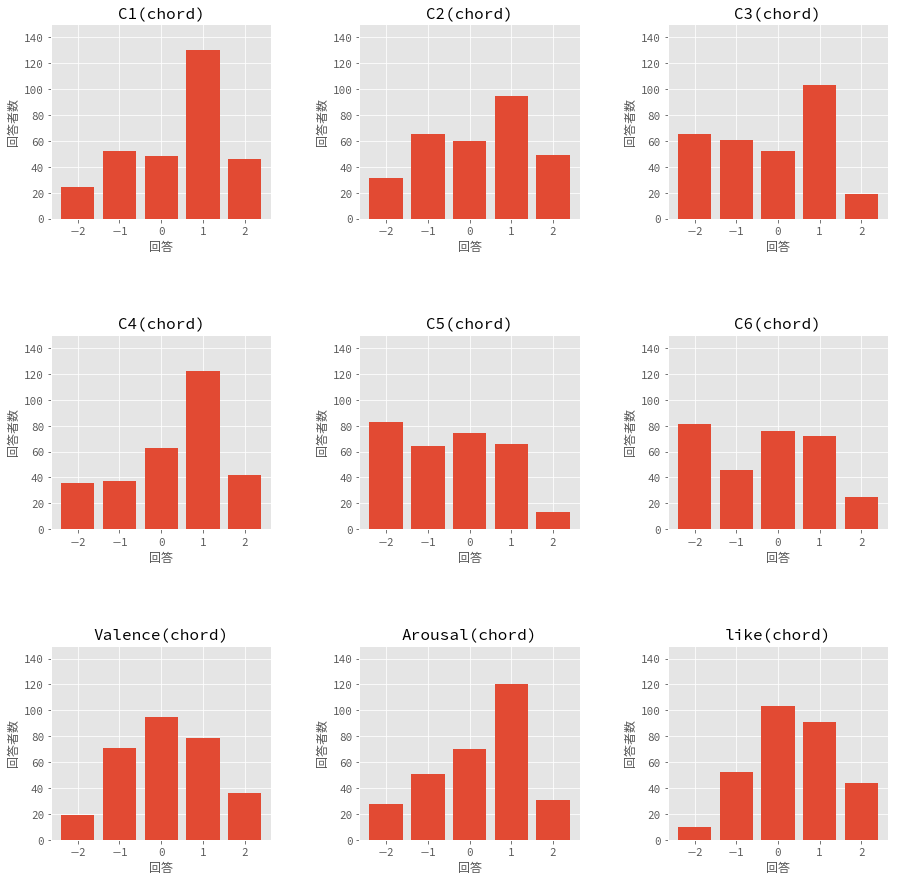

In [35]:
plt.clf()
fig, axes = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items):
    y = chords.groupby(e_item).size()
    x = list(y.index)
    px = int(i / 3)
    py = i % 3
    axes[px, py].bar(x, y)
    axes[px, py].set_title('%s(chord)' % e_item)
    axes[px, py].set_ylabel('回答者数')
    axes[px, py].set_xlabel('回答')
    axes[px, py].set_ylim([0, 150])
plt.show()

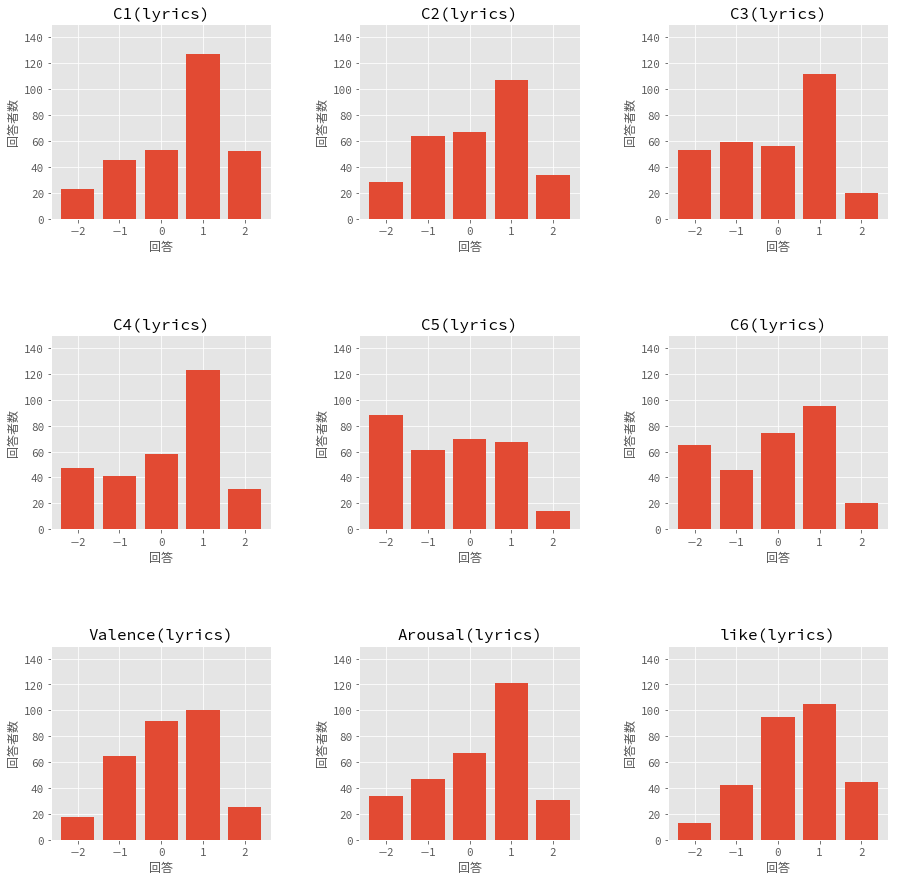

In [36]:
plt.clf()
fig, axes = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items):
    y = lyrics.groupby(e_item).size()
    x = list(y.index)
    px = int(i / 3)
    py = i % 3
    axes[px, py].bar(x, y)
    axes[px, py].set_title('%s(lyrics)' % e_item)
    axes[px, py].set_ylabel('回答者数')
    axes[px, py].set_xlabel('回答')
    axes[px, py].set_ylim([0, 150])
plt.show()

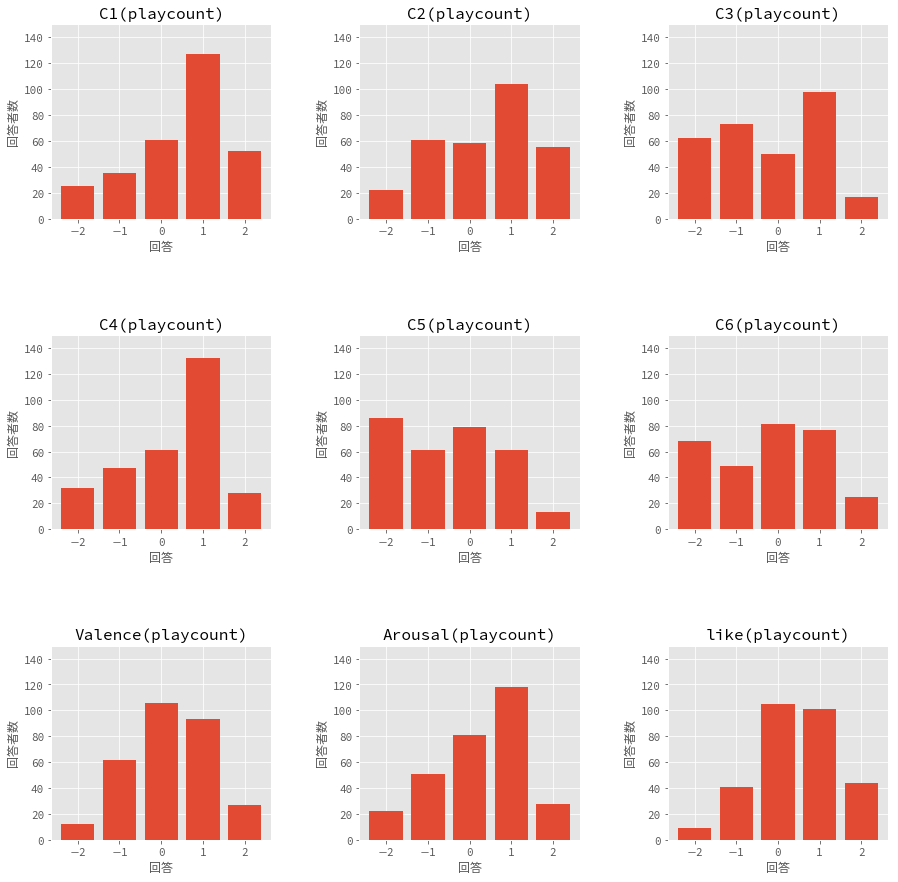

In [37]:
plt.clf()
fig, axes = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items):
    y = playcounts.groupby(e_item).size()
    x = list(y.index)
    px = int(i / 3)
    py = i % 3
    axes[px, py].bar(x, y)
    axes[px, py].set_title('%s(playcount)' % e_item)
    axes[px, py].set_ylabel('回答者数')
    axes[px, py].set_xlabel('回答')
    axes[px, py].set_ylim([0, 150])
plt.show()

In [8]:
results_ttest = pd.DataFrame()
results_wilcoxon = pd.DataFrame()
for e_item in e_items:
    none_values = results[results['prime'] == 'none'][e_item]
    result_ttest = pd.Series()
    result_wilcoxon = pd.Series()
    for prime in primes[1:]:
        prime_values = results[results['prime'] == prime][e_item]
        t, tp = stats.ttest_ind(none_values, prime_values)
        w, wp = stats.wilcoxon(none_values, prime_values)
        result_ttest[prime] = tp
        result_wilcoxon[prime] = wp
    results_ttest[e_item] = result_ttest
    results_wilcoxon[e_item] = result_wilcoxon

In [9]:
results_ttest

,C1,C2,C3,C4,C5,C6,Valence,Arousal,like
bpm,0.600319,0.947055,0.609739,0.868972,0.824995,0.585385,1.000000,0.262903,1.000000
chord,0.485688,0.672171,0.849322,0.512182,0.748103,0.684411,0.770935,0.167279,0.373423
lyrics,0.944212,0.420410,0.167292,0.383402,0.848609,0.307074,0.970265,0.108716,0.907849
playcount,0.888168,0.320553,0.773577,1.000000,0.948691,0.633955,0.675220,0.203354,1.000000


In [10]:
results_wilcoxon

,C1,C2,C3,C4,C5,C6,Valence,Arousal,like
bpm,0.618778,0.769628,0.579343,0.839831,0.917720,0.480826,0.952128,0.071158,0.917480
chord,0.413183,0.523874,0.826895,0.330569,0.714860,0.562280,0.797646,0.028196,0.249494
lyrics,0.931911,0.362309,0.133076,0.271194,0.839857,0.260622,0.879291,0.017243,0.853971
playcount,0.844774,0.327750,0.715699,0.901126,0.894470,0.677542,0.621627,0.078848,0.897672
